In [1]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [45]:
X ,y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=4,
                  cluster_std=2.5,
                  shuffle=True,
                  random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_train.dtype, y_train.dtype

(torch.Size([800, 2]), torch.Size([800]), torch.float32, torch.int64)

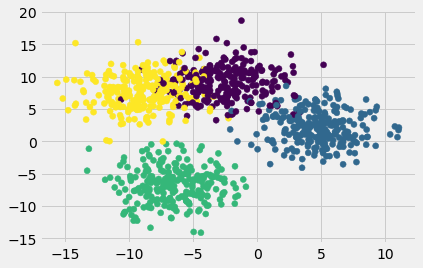

In [46]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [47]:
class BlobsClassifier(nn.Module):
  def __init__(self, in_features, out_features, hidden_layer=32):
    super().__init__()
    self.FcLayer = nn.Sequential(nn.Linear(in_features=in_features, out_features=hidden_layer),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_layer, out_features=out_features),
                                  )
  
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.FcLayer(x)

In [48]:
blob_model = BlobsClassifier(in_features=2,
                             out_features=4)

loss_fn = torch.nn.CrossEntropyLoss()

opt = torch.optim.SGD(blob_model.parameters(),
                      lr=0.01)

def accuracy_fn(y_true, y_pred):
  acc = torch.eq(y_true, y_pred)
  return (torch.count_nonzero(acc)/len(y_true))*100

In [49]:
list(blob_model.parameters())[1]

Parameter containing:
tensor([-0.2218,  0.2707,  0.3766, -0.5238, -0.5448, -0.0732,  0.1333,  0.5303,
        -0.4294,  0.0050, -0.2139, -0.3815,  0.0744, -0.2444,  0.0361,  0.5728,
        -0.1572,  0.2548,  0.2856, -0.2325, -0.3315,  0.1503, -0.5382, -0.2966,
        -0.6920, -0.0045, -0.4363, -0.0017, -0.6921,  0.2407,  0.1614,  0.3000],
       requires_grad=True)

In [50]:
with torch.inference_mode():
  predic = blob_model(X_train)

# torch.softmax(predic, dim=1).argmax(dim=1)

In [51]:
a = torch.tensor([1, 2, 3, 4, 5])
b = torch.tensor([1, 1, 1, 4, 6])

accuracy_fn(a, b)

tensor(40.)

In [52]:
epochs = 100
epochs_count = []
loss_count = []
accuracy_count = []
loss_test_count = []
accuracy_test_count = []

for epoch in range(epochs):
  blob_model.train()

  y_logit = blob_model(X_train)
  y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

  loss = loss_fn(y_logit, y_train)
  accuracy = accuracy_fn(y_train, y_pred)

  opt.zero_grad()
  loss.backward()
  opt.step()

  with torch.inference_mode():
    y_logit_test = blob_model(X_test)
    y_pred_test = torch.softmax(y_logit_test, dim=1).argmax(dim=1)

    loss_test = loss_fn(y_logit_test, y_test)
    accuracy_test = accuracy_fn(y_test, y_pred_test)

    epochs_count.append(epoch)
    loss_count.append(loss.detach().numpy())
    accuracy_count.append(accuracy.detach().numpy())
    loss_test_count.append(loss_test.detach().numpy())
    accuracy_test_count.append(accuracy_test.detach().numpy())

    if epoch % 5 == 0:
      print(f'epoch: {epoch} -- accuracy: {accuracy:.3f} -- loss: {loss:.2f}')

epoch: 0 -- accuracy: 13.250 -- loss: 1.48
epoch: 5 -- accuracy: 11.125 -- loss: 1.30
epoch: 10 -- accuracy: 46.500 -- loss: 1.15
epoch: 15 -- accuracy: 57.375 -- loss: 1.03
epoch: 20 -- accuracy: 62.625 -- loss: 0.94
epoch: 25 -- accuracy: 68.375 -- loss: 0.85
epoch: 30 -- accuracy: 83.250 -- loss: 0.78
epoch: 35 -- accuracy: 88.125 -- loss: 0.72
epoch: 40 -- accuracy: 89.500 -- loss: 0.66
epoch: 45 -- accuracy: 90.375 -- loss: 0.61
epoch: 50 -- accuracy: 90.625 -- loss: 0.57
epoch: 55 -- accuracy: 91.125 -- loss: 0.53
epoch: 60 -- accuracy: 91.500 -- loss: 0.50
epoch: 65 -- accuracy: 91.375 -- loss: 0.47
epoch: 70 -- accuracy: 91.250 -- loss: 0.45
epoch: 75 -- accuracy: 91.250 -- loss: 0.42
epoch: 80 -- accuracy: 91.125 -- loss: 0.40
epoch: 85 -- accuracy: 91.625 -- loss: 0.38
epoch: 90 -- accuracy: 91.625 -- loss: 0.37
epoch: 95 -- accuracy: 91.625 -- loss: 0.35


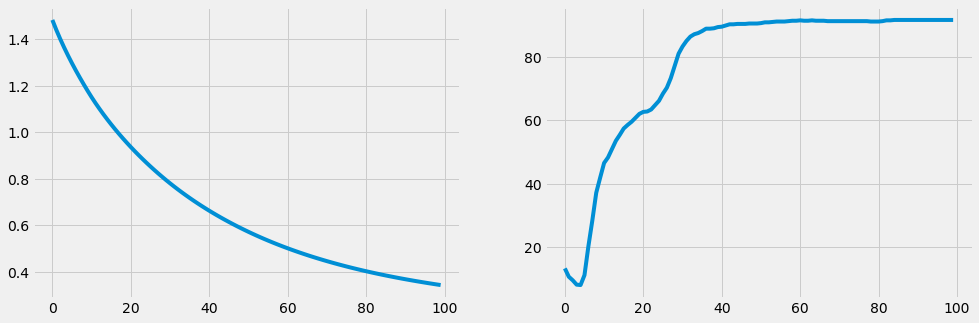

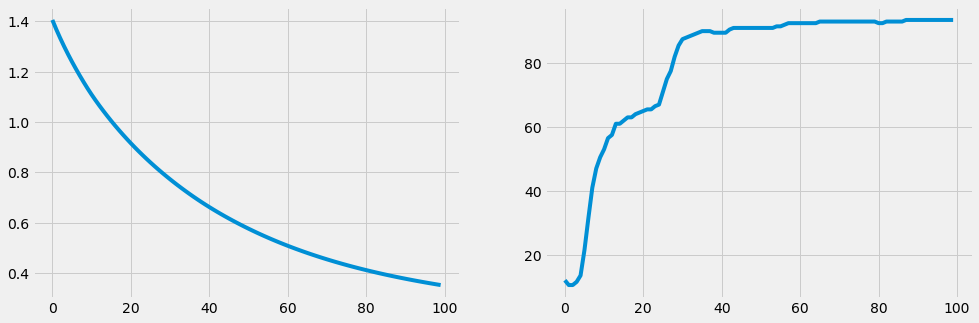

In [53]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(epochs_count, loss_count)
ax2.plot(epochs_count, accuracy_count)

ax3.plot(epochs_count, loss_test_count)
ax4.plot(epochs_count, accuracy_test_count)

In [31]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [19]:
loss_count.detach().numpy()

AttributeError: ignored